# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:605]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        print(json.dumps(city_weather))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alotau
{"cod": "404", "message": "city not found"}
City not found. Skipping...
Processing Record 2 of Set 1 | shimoda
{"coord": {"lon": 138.95, "lat": 34.6667}, "weather": [{"id": 501, "main": "Rain", "description": "moderate rain", "icon": "10d"}], "base": "stations", "main": {"temp": 47.1, "feels_like": 41.97, "temp_min": 47.1, "temp_max": 47.1, "pressure": 1023, "humidity": 68, "sea_level": 1023, "grnd_level": 1023}, "visibility": 10000, "wind": {"speed": 11.39, "deg": 254, "gust": 17.09}, "rain": {"1h": 2.05}, "clouds": {"all": 99}, "dt": 1711146008, "sys": {"type": 2, "id": 2019346, "country": "JP", "sunrise": 1711140229, "sunset": 1711184260}, "timezone": 32400, "id": 1852357, "name": "Shimoda", "cod": 200}
Processing Record 3 of Set 1 | manokwari
{"coord": {"lon": 134.0833, "lat": -0.8667}, "weather": [{"id": 804, "main": "Clouds", "description": "overcast clouds", "icon": "04d"}], "base":

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [30]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shimoda,34.6667,138.9500,47.10,68,99,11.39,JP,1711146008
1,manokwari,-0.8667,134.0833,78.12,80,100,3.04,ID,1711146008
2,waitangi,-43.9535,-176.5597,58.82,84,100,1.99,NZ,1711146009
3,adamstown,-25.0660,-130.1015,77.16,74,70,10.04,PN,1711146010
4,ust'-ilimsk,58.0006,102.6619,-14.57,100,68,3.00,RU,1711146011
5,ulladulla,-35.3500,150.4667,64.85,83,48,9.46,AU,1711146012
6,nikolayevsk-on-amure,53.1406,140.7300,22.37,91,76,2.80,RU,1711146014
7,tadjourah,12.0000,42.5000,76.69,58,41,5.79,DJ,1711146016
8,aswan,24.0934,32.9070,65.14,17,0,12.71,EG,1711145874
9,lebork,54.5392,17.7501,48.47,93,100,11.32,PL,1711146017


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shimoda,34.6667,138.9500,47.10,68,99,11.39,JP,1711146008
1,manokwari,-0.8667,134.0833,78.12,80,100,3.04,ID,1711146008
2,waitangi,-43.9535,-176.5597,58.82,84,100,1.99,NZ,1711146009
3,adamstown,-25.0660,-130.1015,77.16,74,70,10.04,PN,1711146010
4,ust'-ilimsk,58.0006,102.6619,-14.57,100,68,3.00,RU,1711146011


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

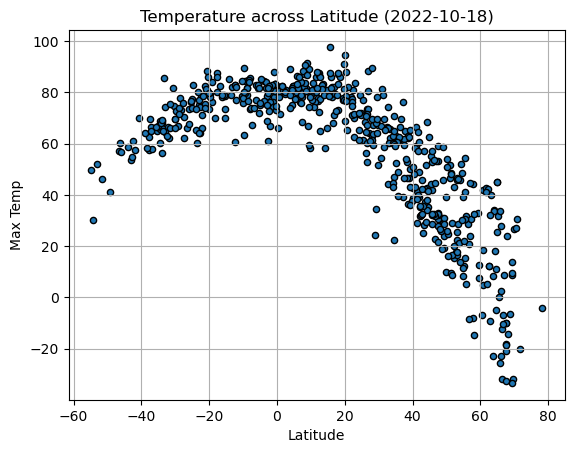

In [45]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x = 'Lat', y = 'Max Temp', kind = 'scatter', ec = 'black')

# Incorporate the other graph properties
plt.title('Temperature across Latitude (2022-10-18)')
plt.grid()
plt.xlabel('Latitude')
#plt.edgecolor('black')

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

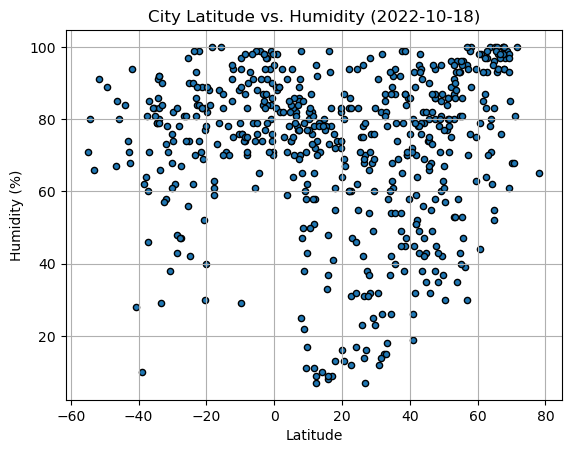

In [46]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = 'Lat', y = 'Humidity', kind = 'scatter', ec = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

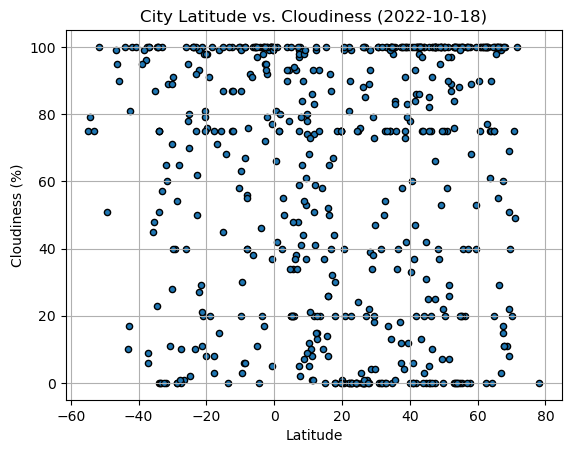

In [50]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x = 'Lat', y = 'Cloudiness', kind = 'scatter', ec = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

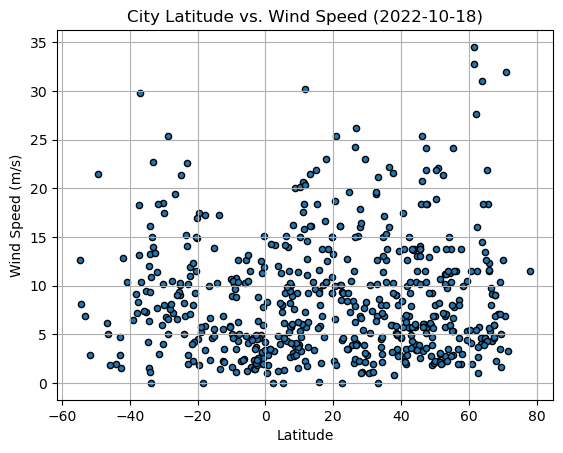

In [53]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x = 'Lat', y = 'Wind Speed', kind = 'scatter', ec = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def linear_reg_plot(df, x_col, y_col):
    x_values = df[x_col].astype(float)
    y_values = df[y_col].astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    #plot graph
    plt.scatter(x = x_values, y = y_values)
    #Display linear regression equation
    lin_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #Display linear regression line
    plt.plot(x_values, regress_values, "r-")
    #Label plot title and axes
    plt.title(f'Linear Regression Plot for {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    #Print the r value
    print(f'The r-value is {rvalue} and the linear equation is {lin_eq}')

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shimoda,34.6667,138.9500,47.10,68,99,11.39,JP,1711146008
4,ust'-ilimsk,58.0006,102.6619,-14.57,100,68,3.00,RU,1711146011
6,nikolayevsk-on-amure,53.1406,140.7300,22.37,91,76,2.80,RU,1711146014
7,tadjourah,12.0000,42.5000,76.69,58,41,5.79,DJ,1711146016
8,aswan,24.0934,32.9070,65.14,17,0,12.71,EG,1711145874


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df[city_data_df['Lat']<= 0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,manokwari,-0.8667,134.0833,78.12,80,100,3.04,ID,1711146008
2,waitangi,-43.9535,-176.5597,58.82,84,100,1.99,NZ,1711146009
3,adamstown,-25.0660,-130.1015,77.16,74,70,10.04,PN,1711146010
5,ulladulla,-35.3500,150.4667,64.85,83,48,9.46,AU,1711146012
10,port mathurin,-19.6833,63.4167,79.48,82,76,17.45,MU,1711146017


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8710476242935355 and the linear equation is y = -1.27x + 96.13


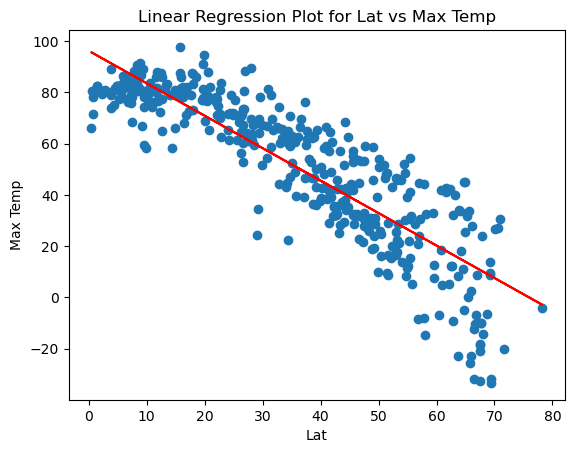

In [79]:
# Linear regression on Northern Hemisphere
linear_reg_plot(northern_hem_df, 'Lat', 'Max Temp')

The r-value is 0.7195949447802604 and the linear equation is y = 0.5x + 83.33


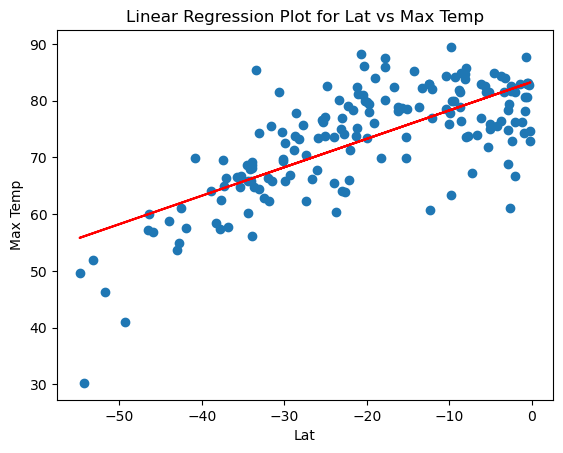

In [80]:
# Linear regression on Southern Hemisphere
linear_reg_plot(southern_hem_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** The linear regression line here shows a strong correlation between temperature and latitude. The farther from the equator, or where lat = 0, the lower the maximum temperature for both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.23210139937030735 and the linear equation is y = 0.28x + 59.83


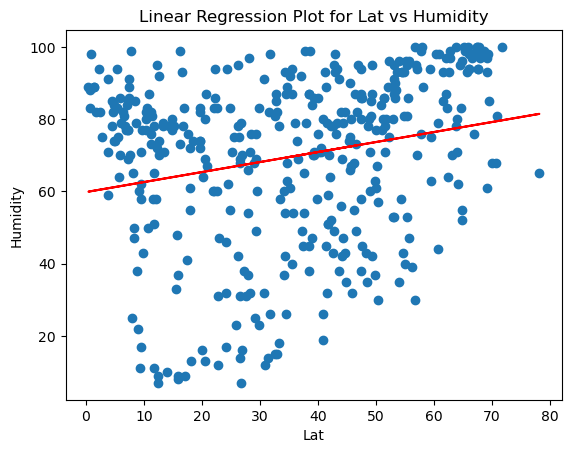

In [81]:
# Northern Hemisphere
linear_reg_plot(northern_hem_df, 'Lat', 'Humidity')

The r-value is 0.2960907374434311 and the linear equation is y = 0.34x + 84.23


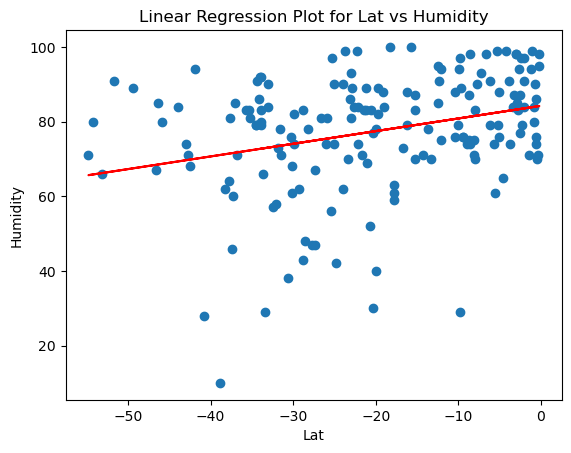

In [82]:
# Southern Hemisphere
linear_reg_plot(southern_hem_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** The graphs show a weakly positive relationship between increasing humidity and increasing latitude in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.14699808740081524 and the linear equation is y = 0.29x + 47.04


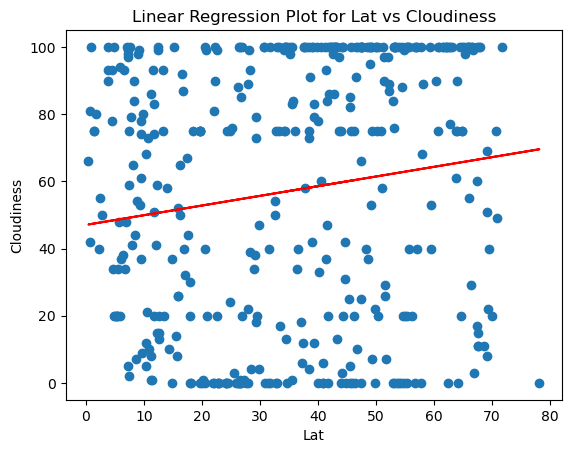

In [83]:
# Northern Hemisphere
linear_reg_plot(northern_hem_df, 'Lat', 'Cloudiness')

The r-value is 0.13143125482031137 and the linear equation is y = 0.34x + 73.09


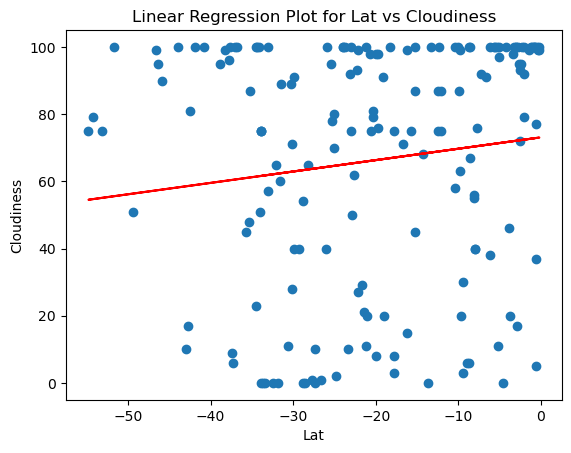

In [84]:
# Southern Hemisphere
linear_reg_plot(southern_hem_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** The graphs show a very weak positive correlation between increasing cloudiness and increasing latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.02186716629997841 and the linear equation is y = 0.01x + 8.7


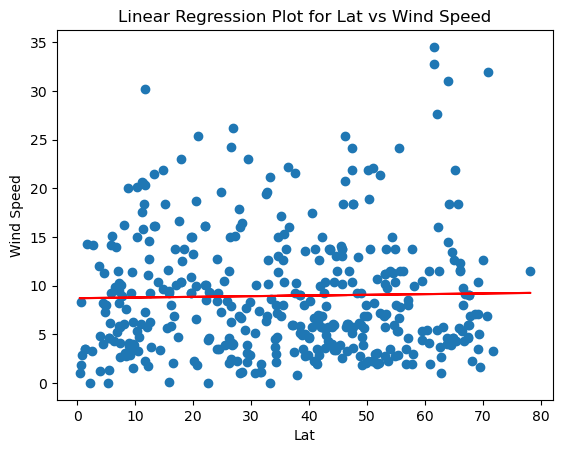

In [85]:
# Northern Hemisphere
linear_reg_plot(northern_hem_df, 'Lat', 'Wind Speed')

The r-value is -0.2653491726631119 and the linear equation is y = -0.1x + 5.96


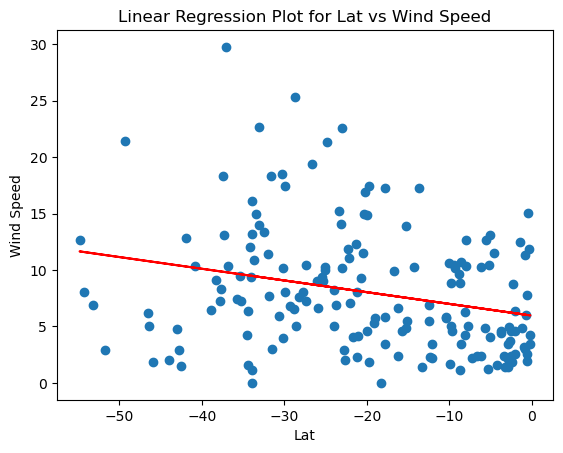

In [86]:
# Southern Hemisphere
linear_reg_plot(southern_hem_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** The graph shows virtually no correlation between latitude and windspeed in both hemispheres.